In [10]:
!git clone https://github.com/jagar2/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing.git
%cd '/content/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/lectures/5_Image_Analysis'

Cloning into 'Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 403 (delta 14), reused 3 (delta 1), pack-reused 375
Receiving objects: 100% (403/403), 123.34 MiB | 10.33 MiB/s, done.
Resolving deltas: 100% (168/168), done.
Checking out files: 100% (124/124), done.
/content/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/lectures/5_Image_Analysis


In [ ]:
%cd '/content/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/lectures/5_Image_Analysis'

/content/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing
Already on 'Josh_Branch'
Your branch is up to date with 'origin/Josh_Branch'.
/content/Summer_2020_MAT-395-495_Scientific-Data-Analysis-and-Computing/lectures/5_Image_Analysis


In [3]:
# This just checks to make sure you have the right packages installed
%run check_setup.py

[✓] scikit-image  0.16.2
[✓] numpy         1.18.5
[✓] scipy         1.4.1
[✓] matplotlib    3.2.2
[✓] notebook      5.2.2
[✓] scikit-learn  0.22.2.post1


In [4]:
# Magic command to make plotting inline
%matplotlib inline

# sets the figure format
%config InlineBackend.figure_format = 'retina'

# Images are numpy arrays

Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array:

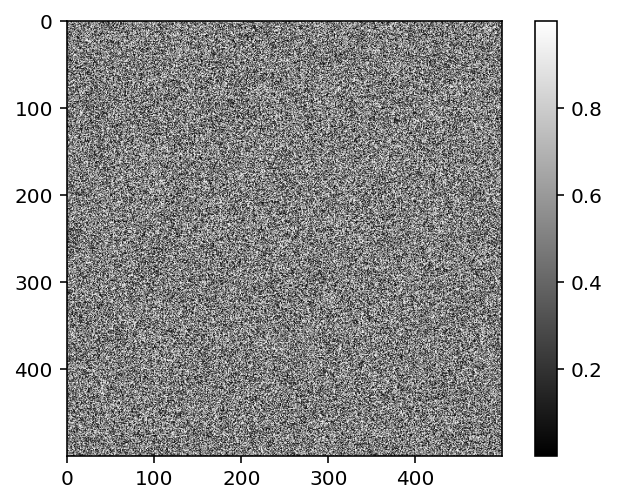

In [5]:
import numpy as np
import matplotlib.pyplot as plt

random_image = np.random.random([500,500])

plt.imshow(random_image, cmap='gray')

plt.colorbar()

In [7]:
random_image.shape


(500, 500)

type <class 'numpy.ndarray'>
dtype uint8
shape (303, 384)


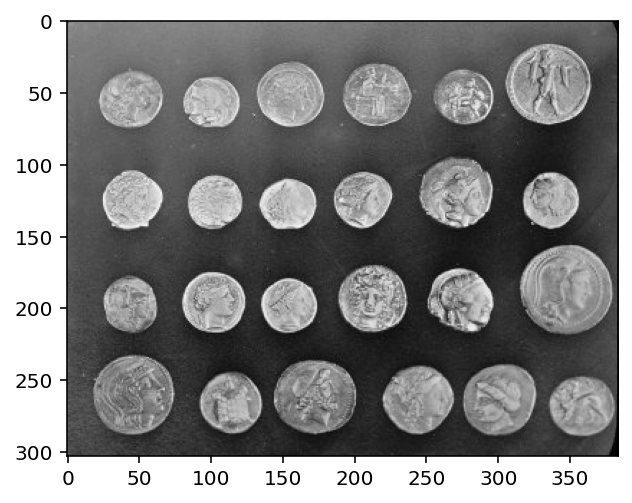

In [11]:
from skimage import data

coins = data.coins()

print('type', type(coins))
print('dtype', coins.dtype)
print('shape', coins.shape)

plt.imshow(coins, cmap = 'gray')

shape: (300, 451, 3)
min/max 0 231


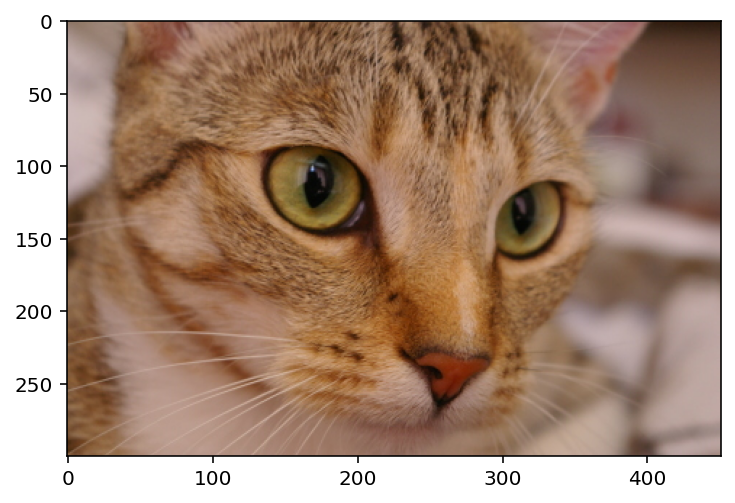

In [12]:
cat = data.chelsea()
print("shape:", cat.shape)
print('min/max', cat.min(), cat.max())

plt.imshow(cat)

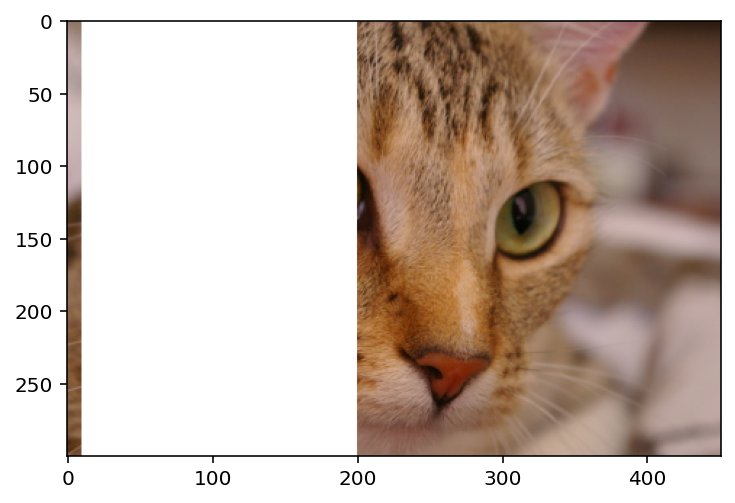

In [18]:
# starts at x,y=10 to x,y = 110 red box
cat[:, 10:200, :] = [255, 255, 255]

plt.imshow(cat)



### Other shapes, and their meanings

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale (or volumetric) |(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

## Displaying images using matplotlib

In [19]:
from skimage import data

img0 = data.chelsea()
img1 = data.rocket()

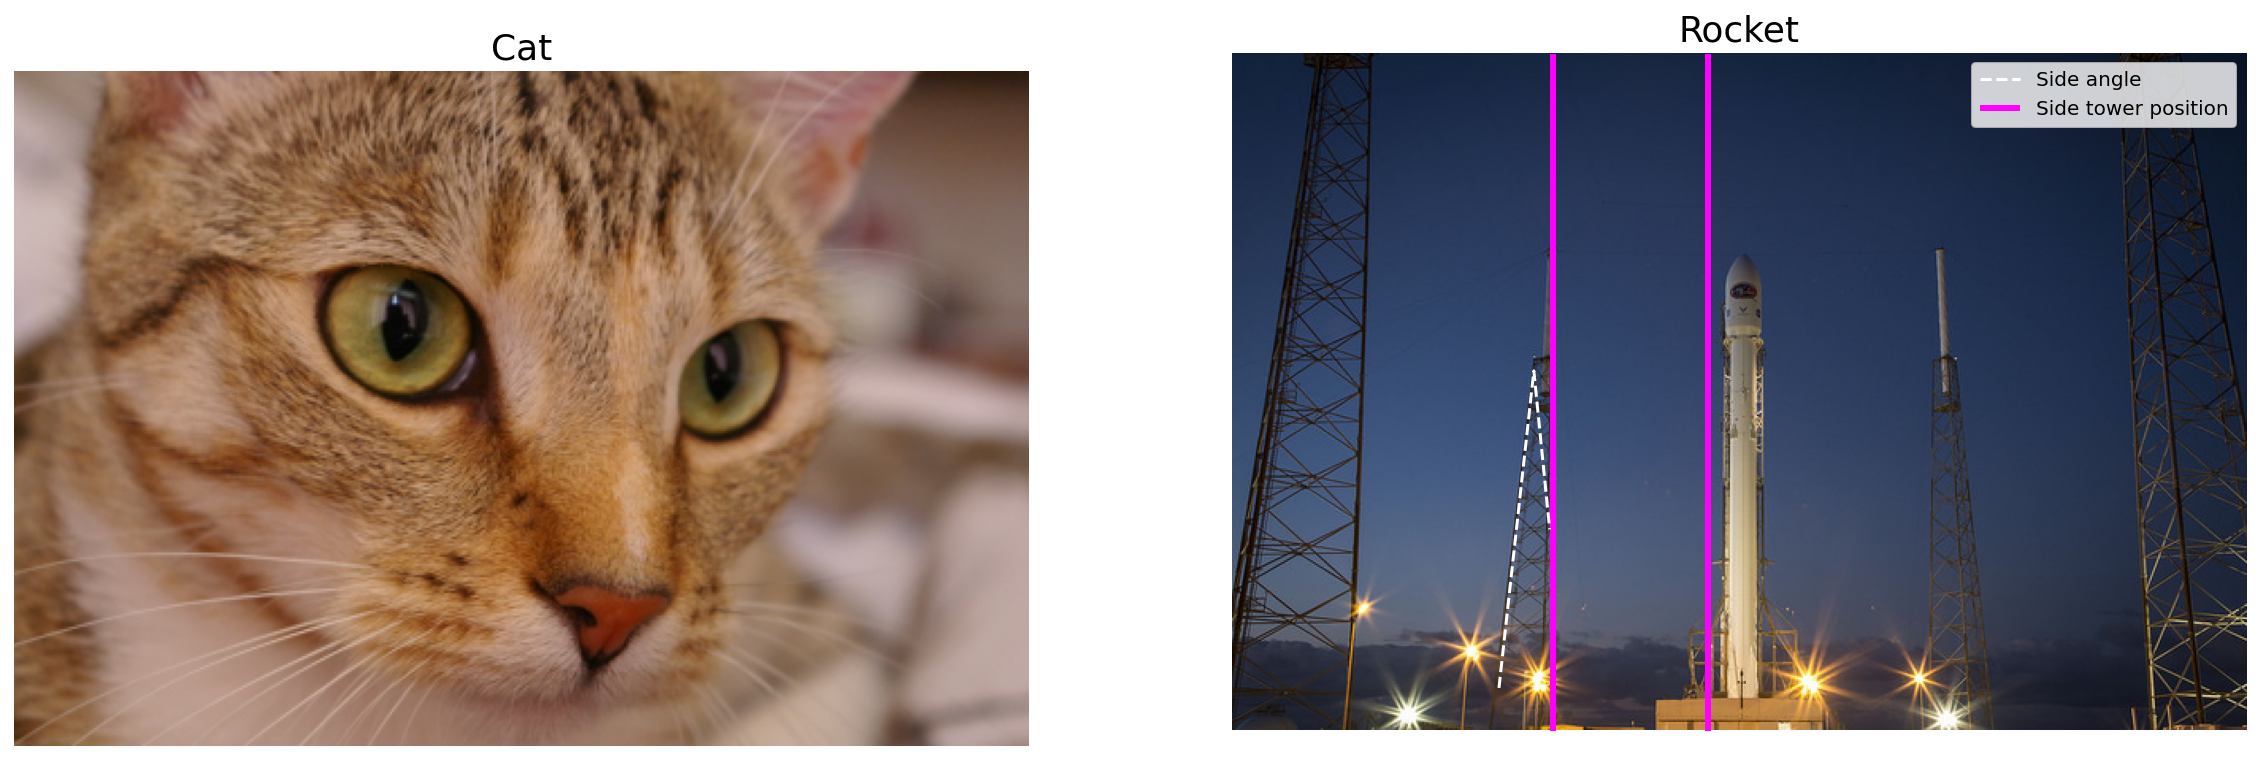

In [21]:
import matplotlib.pyplot as plt

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img0)
ax0.set_title('Cat', fontsize=18)
ax0.axis('off')

ax1.imshow(img1)
ax1.set_title('Rocket', fontsize=18)
ax1.set_xlabel(r'Launching position $\alpha=320$')
ax1.axis('off')

ax1.vlines([202, 300], 0, img1.shape[0], colors='magenta', linewidth=3, label='Side tower position')
ax1.plot([168, 190, 200], [400, 200, 300], color='white', linestyle='--', label='Side angle')

ax1.legend();

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.

E.g., here, I generate two valid images:

linear0: float64 0.0 1.0
linear1: float64 0.0 255.0


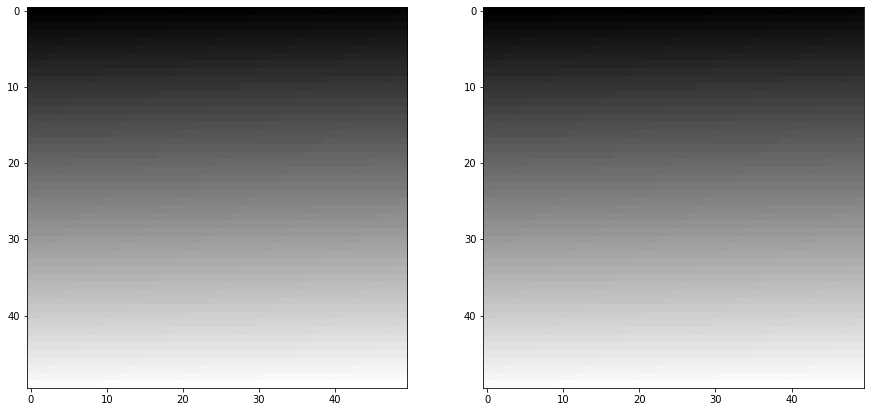

In [9]:
import matplotlib.pyplot as plt
import numpy as np

linear0 = np.linspace(0, 1, 2500).reshape(50,50)
linear1 = linear0*255 #np.linspace(0, 255, 2500).reshape(50,50)


print("linear0:", linear0.dtype, linear0.min(), linear0.max())
print("linear1:", linear1.dtype, linear1.min(), linear1.max())


fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,15))

ax0.imshow(linear0, 'gray')
ax1.imshow(linear1, 'gray')

## Image I/O


Mostly, we won't be using input images from the scikit-image example data sets.  Those images are typically stored in JPEG or PNG format.  Since scikit-image operates on NumPy arrays, *any* image reader library that provides arrays will do.  Options include imageio, matplotlib, pillow, etc.

scikit-image conveniently wraps many of these in the `io` submodule, and will use whichever of the libraries mentioned above are installed:

<class 'numpy.ndarray'>
uint8
(300, 225, 3)
0 255


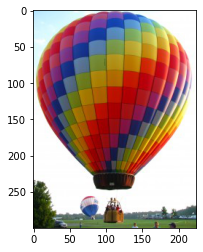

In [14]:
from skimage import io

image = io.imread('./images/balloon.jpg')

print(type(image))
print(image.dtype)
print(image.shape)
print(image.min(), image.max())

plt.imshow(image)

In [19]:
ic = io.ImageCollection('./images/*.png:./images/*.jpg')

print('Type:', type(ic))

ic.files

Type: <class 'skimage.io.collection.ImageCollection'>


['./images/Bells-Beach.jpg',
 './images/balloon.jpg',
 './images/bubbles.jpg',
 './images/censure_example.png',
 './images/chapel_floor.png',
 './images/chromosomes.jpg',
 './images/clock_motion.png',
 './images/color-wheel.jpg',
 './images/credit_card.jpg',
 './images/cycle_spin.png',
 './images/fingers.png',
 './images/forest.jpg',
 './images/greenscreen.jpg',
 './images/hand-coin.jpg',
 './images/microarray.jpg',
 './images/mm.jpg',
 './images/mona_lisa.jpg',
 './images/mpl_hist.png',
 './images/round_pill.jpg',
 './images/snakes.png',
 './images/spice_1.jpg',
 './images/spices.jpg',
 './images/stefan.jpg',
 './images/superprom_prev.jpg',
 './images/terminator_vision.png',
 './images/zebrafish-spinal-cord-color.png',
 './images/zebrafish-spinal-cord.png']

In [33]:
len(ic) // 3

9

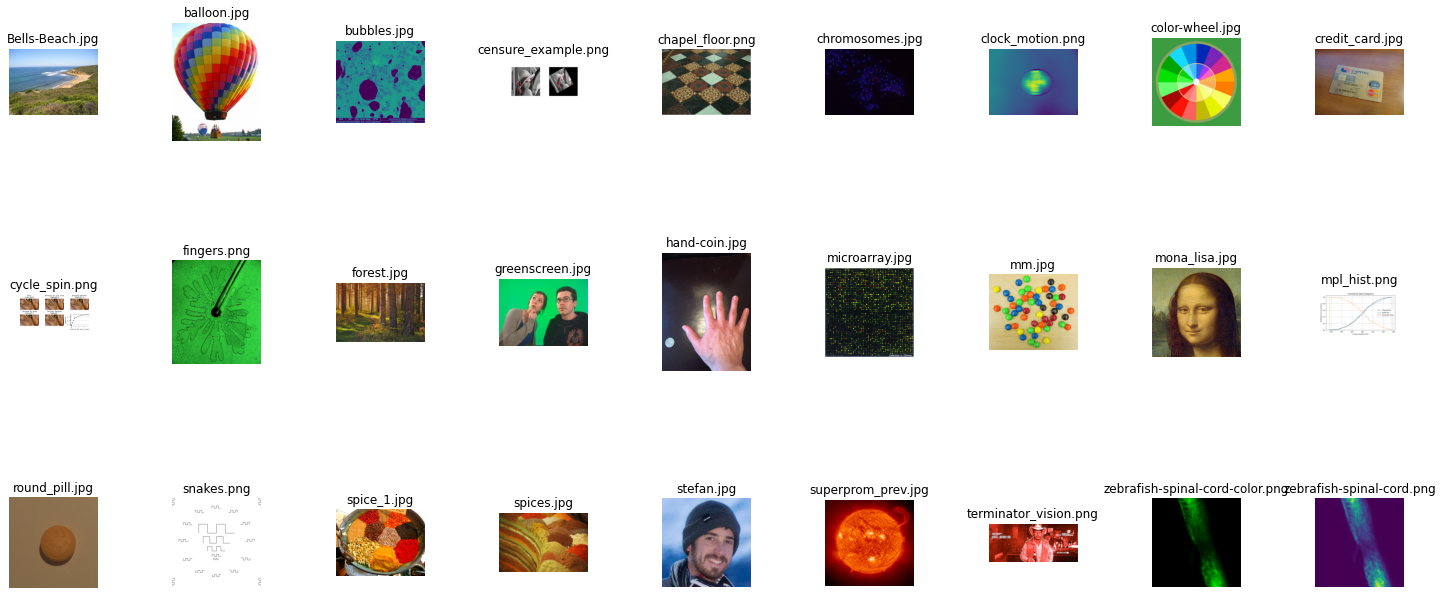

In [34]:
import os

f, axes = plt.subplots(nrows=3, ncols = len(ic) // 3, figsize = (20, 10))

axes = axes.ravel()

for ax in axes: 
  ax.axis('off')


# enumerate
# os.path.basename()

for i, images in enumerate(ic):
  axes[i].imshow(images)
  axes[i].set_title(os.path.basename(ic.files[i]))

plt.tight_layout()

AxesSubplot(0.125,0.125;0.227941x0.755) (300, 300)
AxesSubplot(0.398529,0.125;0.227941x0.755) (300, 300)
AxesSubplot(0.672059,0.125;0.227941x0.755) (300, 300)


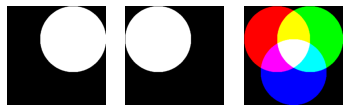

In [48]:
from skimage import draw

red = np.zeros((300,300))
green = np.zeros((300,300))
blue = np.zeros((300,300))

r, c = draw.circle(100,200,100)
red[r, c] = 1

r, c = draw.circle(100,100,100)
green[r, c] = 1

r, c = draw.circle(200,150,100)
blue[r, c] = 1

f, axes = plt.subplots(1,3)

for (ax, channel) in zip(axes, [red, green, blue]):
  print(ax, channel.shape)

  ax.imshow(channel, cmap = 'gray')
  ax.axis('off')

#np.stack
plt.imshow(np.stack([green, red , blue], axis=-1))

# Image filtering

Filtering is one of the most basic and common image operations in image processing. You can filter an image to remove noise or to enhance features; the filtered image could be the desired result or just a preprocessing step. Regardless, filtering is an important topic to understand.

In [49]:
plt.rcParams['image.cmap'] = 'gray'

The "local" in local filtering simply means that a pixel is adjusted by values in some surrounding neighborhood. These surrounding elements are identified or weighted based on a "footprint", "structuring element", or "kernel".

Let's go to back to basics and look at a 1D step-signal

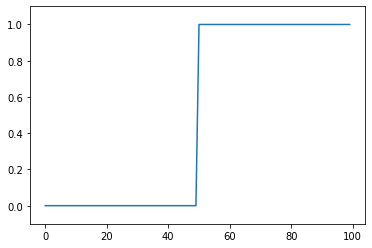

In [51]:
step_signal = np.zeros(100)
step_signal[50:] = 1


f, ax = plt.subplots()

ax.plot(step_signal)
ax.margins(y=0.1)

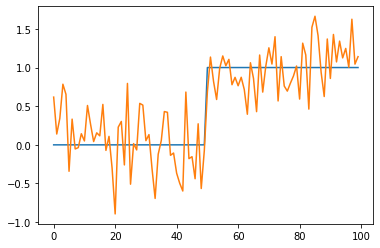

In [53]:
np.random.seed(0)

noisy_signal = (step_signal + np.random.normal(0, 0.35, step_signal.shape))

f, ax = plt.subplots()

ax.plot(step_signal)
ax.plot(noisy_signal)

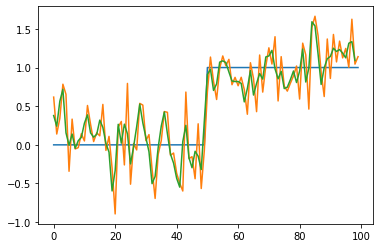

In [54]:
smooth_signal = (noisy_signal[:-1] + noisy_signal[1:]) / 2.0

f, ax = plt.subplots()

ax.plot(step_signal)
ax.plot(noisy_signal)
ax.plot(smooth_signal)

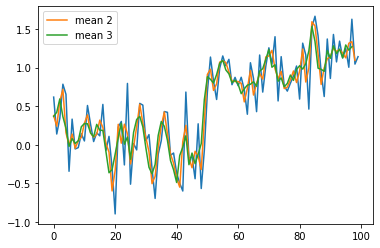

In [63]:
smooth_signal_3 = (noisy_signal[:-2] + noisy_signal[1:-1]+ noisy_signal[2:]) / 3

f, ax = plt.subplots()

#ax.plot(step_signal)
ax.plot(noisy_signal)
ax.plot(smooth_signal, label = 'mean 2')
ax.plot(smooth_signal_3, label = 'mean 3')

ax.legend(loc='upper left')

For averages of more points, the expression keeps getting hairier. And you have to worry more about what's going on in the margins. Is there a better way?

It turns out there is. This same concept, nearest-neighbor averages, can be expressed as a *convolution* with an *averaging kernel*. Note that the operation we did with `smooth_signal3` can be expressed as follows:

* Create an output array called `smooth_signal3`, of the same length as `noisy_signal`.
* At each element in `smooth_signal3` starting at point 1, and ending at point -2, place the average of the sum of: 1/3 of the element to the left of it in `noisy_signal`, 1/3 of the element at the same position, and 1/3 of the element to the right.
* discard the leftmost and rightmost elements.

This is called a *convolution* between the input image and the array `[1/3, 1/3, 1/3]`. (We'll give a more in-depth explanation of convolution in the next section).

[0.33333333 0.33333333 0.33333333]


False

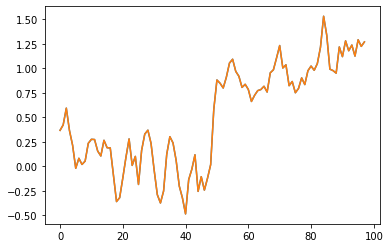

In [65]:
mean_kernel3 = np.full((3,), 1/3)
print(mean_kernel3)

smooth_signal_3K = np.convolve(noisy_signal, mean_kernel3, mode='valid')

f, ax = plt.subplots()

#ax.plot(step_signal)
#ax.plot(noisy_signal)
#ax.plot(smooth_signal, label = 'mean 2')
ax.plot(smooth_signal_3, label = 'mean 3')
ax.plot(smooth_signal_3K)

np.all(smooth_signal_3K == smooth_signal_3)

In [62]:
def convolve_demo(signal, kernel):
    ksize = len(kernel)
    convolved = np.correlate(signal, kernel)
    def filter_step(i):
        fig, ax = plt.subplots()
        ax.plot(signal, label='signal')
        ax.plot(convolved[:i+1], label='convolved')
        ax.legend()
        ax.scatter(np.arange(i, i+ksize),
                   signal[i : i+ksize])
        ax.scatter(i, convolved[i])
    return filter_step

from ipywidgets import interact, widgets

i_slider = widgets.IntSlider(min=0, max=len(noisy_signal) - 3,
                             value=0)

interact(convolve_demo(noisy_signal, mean_kernel3),
         i=i_slider);

interactive(children=(IntSlider(value=0, description='i', max=97), Output()), _dom_classes=('widget-interact',…

In [67]:
mean_kernel11

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

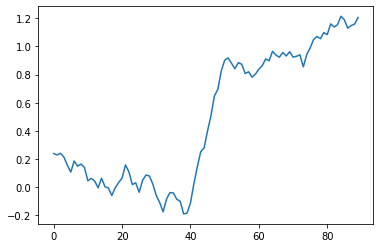

In [66]:
mean_kernel11 = np.full((11,), 1/11)
smooth_signal11 = np.convolve(noisy_signal, mean_kernel11, mode='valid')

plt.plot(smooth_signal11)

In [68]:
i_slider = widgets.IntSlider(min=0, max=len(noisy_signal) - 11,
                             value=0)

interact(convolve_demo(noisy_signal, mean_kernel11),
         i=i_slider);

interactive(children=(IntSlider(value=0, description='i', max=89), Output()), _dom_classes=('widget-interact',…

Of course, to take the mean of 11 values, we have to move further and further away from the edges, and this starts to be noticeable. You can use mode='same' to pad the edges of the array and compute a result of the same size as the input:

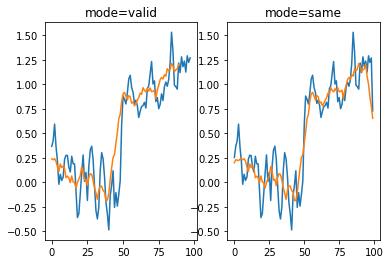

In [71]:
smooth_signal3same = np.convolve(noisy_signal, mean_kernel3,
                                 mode='same')
smooth_signal11same = np.convolve(noisy_signal, mean_kernel11,
                                  mode='same')

fig, ax = plt.subplots(1, 2)
ax[0].plot(smooth_signal_3K)
ax[0].plot(smooth_signal11)
ax[0].set_title('mode=valid')
ax[1].plot(smooth_signal3same)
ax[1].plot(smooth_signal11same)
ax[1].set_title('mode=same');

In [72]:
def convolve_demo_same(signal, kernel):
    ksize = len(kernel)
    padded_signal = np.pad(signal, ksize // 2,
                           mode='constant')
    convolved = np.correlate(padded_signal, kernel)
    def filter_step(i):
        fig, ax = plt.subplots()
        x = np.arange(-ksize // 2,
                      len(signal) + ksize // 2)
        ax.plot(signal, label='signal')
        ax.plot(convolved[:i+1], label='convolved')
        ax.legend()
        start, stop = i, i + ksize
        ax.scatter(x[start:stop]+1,
                   padded_signal[start : stop])
        ax.scatter(i, convolved[i])
        ax.set_xlim(-ksize // 2,
                    len(signal) + ksize // 2)
    return filter_step


i_slider = widgets.IntSlider(min=0, max=len(noisy_signal)-1,
                             value=0)

interact(convolve_demo_same(noisy_signal, mean_kernel11),
         i=i_slider);

interactive(children=(IntSlider(value=0, description='i', max=99), Output()), _dom_classes=('widget-interact',…

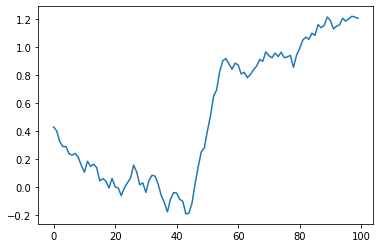

In [73]:
from scipy import ndimage as ndi

smooth_ndi = ndi.convolve(noisy_signal, mean_kernel11,
                          mode='reflect')

plt.plot(smooth_ndi)

**Exercise:** Can you predict what a convolution with the kernel `[-1, 0, 1]` does? Try thinking about it before running the cells below.

In [75]:
results_corr = np.correlate(step_signal, np.array([-1, 0, 1]), mode='valid')


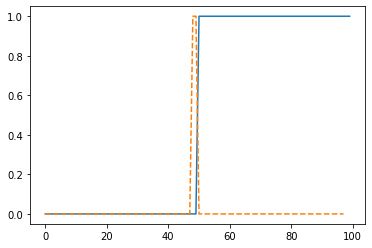

In [76]:
plt.plot(step_signal)
plt.plot(results_corr, '--')

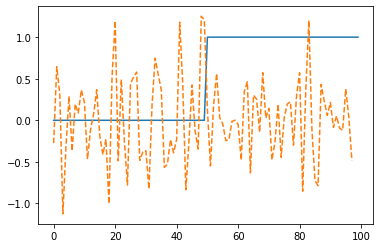

In [77]:
results_corr = np.correlate(noisy_signal, np.array([-1, 0, 1]), mode='valid')
plt.plot(step_signal)
plt.plot(results_corr, '--')

In [78]:
mean_diff = np.correlate([-1, 0, 1], [1/3, 1/3, 1/3], mode='full')
print(mean_diff)

[-0.33333333 -0.33333333  0.          0.33333333  0.33333333]


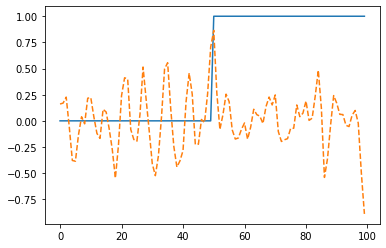

In [79]:
results_corr = np.correlate(noisy_signal, mean_diff, mode='same')
plt.plot(step_signal)
plt.plot(results_corr, '--')

## Image filtering theory

### Local filtering

#### Commutativity and assortativity of filters

## Local filtering of images

## Essential filters

### Gaussian filter

### Basic edge filtering

#### Difference filters in 2D

## Denoising filters

### Median Filter

## Further reading

# Feature detection

## Edge detection

### Canny edge detector

## Hough transforms

### Circle detection

## Further reading

* [Probabilistic Hough transform](http://scikit-image.org/docs/dev/auto_examples/plot_line_hough_transform.html)
* [Circular and elliptical Hough transforms](http://scikit-image.org/docs/dev/auto_examples/plot_circular_elliptical_hough_transform.html)
* [Template matching](http://scikit-image.org/docs/dev/auto_examples/plot_template.html)
* [Histogram of Oriented Gradients](http://scikit-image.org/docs/dev/auto_examples/plot_hog.html)
* [BRIEF](http://scikit-image.org/docs/dev/auto_examples/plot_brief.html), [CENSURE](http://scikit-image.org/docs/dev/auto_examples/plot_censure.html), and [ORB](http://scikit-image.org/docs/dev/auto_examples/plot_orb.html) feature detectors/descriptors
* [Robust matching using RANSAC](http://scikit-image.org/docs/dev/auto_examples/plot_matching.html)